In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.genfromtxt('dataset.csv', delimiter=',', skip_header=1)

In [3]:
data_normalized = (data - data.mean(axis=0)) / data.std(axis=0)

In [4]:
def k_means(data, k, num_iterations=100):
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    
    for _ in range(num_iterations):
        distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)
        
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
        
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return centroids, labels

In [5]:
def plot_clusters(data, labels, centroids, k):
    colors = ['r', 'g', 'b', 'c', 'm', 'y']
    for i in range(k):
        plt.scatter(data[labels == i, 0], data[labels == i, 1], color=colors[i], label=f'Cluster {i+1}')
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', color='k', s=200, label='Centroids')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f'K-means clustering (k={k})')
    plt.legend()
    plt.grid(True)
    plt.show()

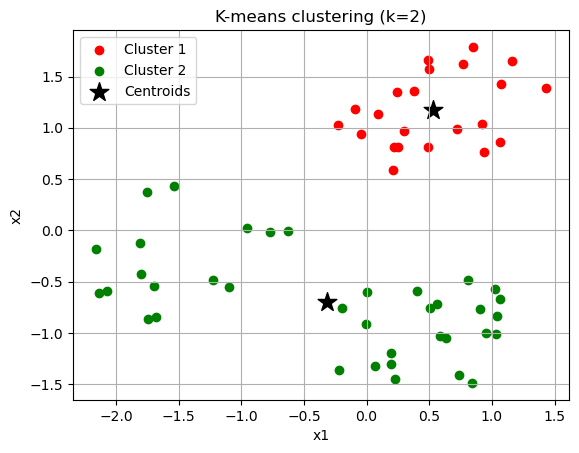

In [6]:
k = 2
centroids_2, labels_2 = k_means(data_normalized, k)
plot_clusters(data_normalized, labels_2, centroids_2, k)

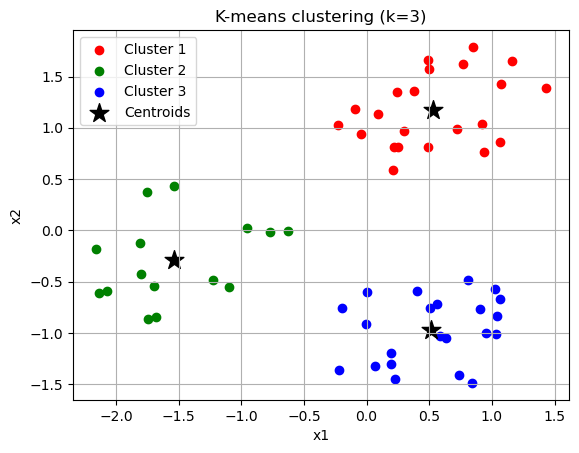

In [7]:
k = 3
centroids_3, labels_3 = k_means(data_normalized, k)
plot_clusters(data_normalized, labels_3, centroids_3, k)